# Hotel Consumptions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [2]:
# Load hotel consumptions csv
hotel_consumptions = pd.read_csv('hotel_consumptions.csv')

In [3]:
hotel_consumptions.tail()

,windSpeed,Temperature,OcupPaxs,Timestamp,CTotal
26409,11,12,NaN,11/30/2017 22:45,20.539231
26410,11,12,NaN,11/30/2017 23:00,21.045000
26411,11,12,NaN,11/30/2017 23:15,21.329231
26412,11,12,NaN,11/30/2017 23:30,21.953077
26413,11,12,NaN,11/30/2017 23:45,23.383077


As the data was loaded the first time, we can see that the "OcupPaxs" column has NaN values, so replacing the NaN values for 0 and converting also those values to integers is the first step.

In [4]:
# Fill all the NaN values for 0
hotel_consumptions = hotel_consumptions.fillna(0)

In [5]:
# Convert OcupPaxs values to int
hotel_consumptions['OcupPaxs'] = hotel_consumptions['OcupPaxs'].astype(int)

Just for better reading and identification the columns "windSpeed", "OcupPaxs" and "CTotal" were renamed to "Wind Speed", "Guests" and "Total Consumption".

In [6]:
# Rename columns
hotel_consumptions = hotel_consumptions.rename(
    mapper={'windSpeed': 'Wind Speed', 'OcupPaxs': 'Guests', 'CTotal': 'Total Consumption'},
    axis='columns')

Two new columns were created to store the week day and the season based on the Timestamp column.

In [7]:
# Create a new column for week days
hotel_consumptions['Week Day'] = pd.to_datetime(hotel_consumptions['Timestamp'])
hotel_consumptions['Week Day'] = hotel_consumptions['Week Day'].dt.day_name()

In [8]:
# Returns season from month number
def getSeason(month):
    if 1 <= month <= 2:
        return 'Winter'
    elif 3 <= month <= 5:
        return 'Sprint'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    elif month == 12:
        return 'Winter'

In [9]:
# Add a new seasons column
hotel_consumptions['Season'] = pd.to_datetime(hotel_consumptions['Timestamp'])
hotel_consumptions['Season'] = hotel_consumptions['Season'].dt.month
hotel_consumptions['Season'] = hotel_consumptions['Season'].apply(getSeason)

In order to store "Timestamp" related columns a reindex was needed to have the "Week Day" and "Season" columns after the "Timestamp" one.

In [10]:
# Reindex columns
hotel_consumptions = hotel_consumptions.reindex(
    columns=['Wind Speed', 'Temperature', 'Guests', 'Timestamp', 'Week Day', 'Season', 'Total Consumption'])

In [11]:
hotel_consumptions.head()

,Wind Speed,Temperature,Guests,Timestamp,Week Day,Season,Total Consumption
0,11,13,363,1/1/2017 0:00,Sunday,Winter,61.892143
1,11,13,363,1/1/2017 0:15,Sunday,Winter,63.693636
2,11,13,363,1/1/2017 0:30,Sunday,Winter,63.354167
3,11,13,363,1/1/2017 0:45,Sunday,Winter,66.613846
4,11,13,363,1/1/2017 1:00,Sunday,Winter,70.403636


After these simple operations, a simple data study can be done to get for example:

**Season with more guests**

In [12]:
hotel_consumptions[["Season", "Guests"]].groupby(by="Season").sum()

,Guests
Season,
Autumn,2565725
Sprint,2605989
Summer,3876157
Winter,930214


**Week days with more energy consumption**

In [13]:
hotel_consumptions[["Week Day", "Total Consumption"]].groupby(by="Week Day").mean()

,Total Consumption
Week Day,
Friday,114.092411
Monday,112.979085
Saturday,111.498028
Sunday,111.030242
Thursday,108.949379
Tuesday,110.550957
Wednesday,107.760470


**Plot comparing the temperature and the number of guests**

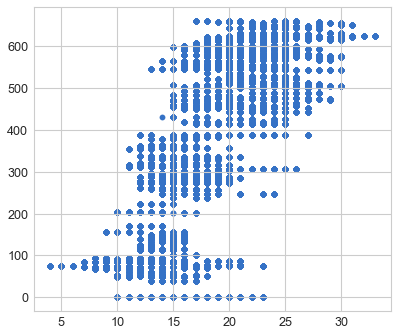

In [14]:
jtplot.style()

x = hotel_consumptions['Temperature'].tolist()
y = hotel_consumptions['Guests'].tolist()

plt.scatter(x, y)
plt.show()

One of the requirements to train a model, is that every value should be float convertible, this means that new columns based on the "Timestamp" one should be created and the "Season" and "Week Day" ones should be changed. 

In [17]:
# Change Season column to store the month
hotel_consumptions['Season'] = pd.to_datetime(hotel_consumptions['Timestamp'])
hotel_consumptions['Season'] = hotel_consumptions['Season'].dt.month

In [ ]:
# Rename Season column to Month
hotel_consumptions = hotel_consumptions.rename(
    mapper={'Season': 'Month'},
    axis='columns')

In [18]:
# Change the Week Day column, to store the week day number instead of the week day name
# Monday=0, Tuesday=1, Wednesday=2, Thursday=3, Friday=4, Saturday=5, Sunday=6
hotel_consumptions['Week Day'] = pd.to_datetime(hotel_consumptions['Timestamp'])
hotel_consumptions['Week Day'] = hotel_consumptions['Week Day'].dt.dayofweek

In [19]:
# Add a new day column 
hotel_consumptions['Day'] = pd.to_datetime(hotel_consumptions['Timestamp'])
hotel_consumptions['Day'] = hotel_consumptions['Day'].dt.day

In [21]:
# Reindex columns
hotel_consumptions = hotel_consumptions.reindex(
    columns=['Wind Speed', 'Temperature', 'Guests', 'Timestamp', 'Day', 'Week Day', 'Month', 'Total Consumption'])

In [22]:
hotel_consumptions = hotel_consumptions.drop(columns=['Timestamp'])

In [23]:
hotel_consumptions.head()

,Wind Speed,Temperature,Guests,Day,Week Day,Month,Total Consumption
0,11,13,363,1,6,1,61.892143
1,11,13,363,1,6,1,63.693636
2,11,13,363,1,6,1,63.354167
3,11,13,363,1,6,1,66.613846
4,11,13,363,1,6,1,70.403636


In order to predict energy consumption for future days, a **Linear Regression** method was chosen.

In [24]:
X, y = hotel_consumptions.values, hotel_consumptions['Total Consumption']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, train_size=.7)

ols = LinearRegression().fit(x_train, y_train)

In [25]:
print("Training set score: {:.2f}".format(ols.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ols.score(x_test, y_test)))

Training set score: 1.00
Test set score: 1.00
